## Use OverPy to collect POI data

In [1]:
import overpy

In [2]:
CITY = 'New Delhi'

query = f'''[out:json];
area[name="{CITY}"];
node["amenity"](area);
out; '''

In [3]:
# api = overpy.Overpass()
# res = api.query(query)

In [4]:
# nodes = []
# for node in res.nodes:
#     if node.tags:
#         nodes.append({
#             'id': node.id,
#             'lon': float(node.lon),
#             'lat': float(node.lat),
#             'amenity': node.tags['amenity']
#         })
# nodes

## Load Data to Pandas Dataframe

In [5]:
import geopandas as gpd

gdf = gpd.read_file('NewDelhi.geojson')
gdf

,id,@id,amenity,name,atm,created_by,brand,brand:wikidata,brand:wikipedia,cuisine,...,drink:shake,seats,healthcare,addr:district,addr:subdistrict,addr:full,addr:state,contact:mobile,operator:type,geometry
0,node/248852574,node/248852574,cafe,Cafe Coffee Day,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (77.15189 28.53349)
1,node/248852583,node/248852583,bank,"ICICI, SBI, Citibank,",yes,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (77.15200 28.53365)
2,node/266442982,node/266442982,cinema,PVR Priya,None,Potlatch 0.9a,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (77.16449 28.55731)
3,node/266443204,node/266443204,bank,Standard Chartered Bank,yes,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (77.16455 28.55785)
4,node/266443228,node/266443228,fast_food,McDonald's,None,None,McDonald's,Q38076,en:McDonald's,burger,...,None,None,None,None,None,None,None,None,None,POINT (77.16376 28.55733)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,node/6908305667,node/6908305667,drinking_water,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (77.18404 28.57045)
969,node/6918479553,node/6918479553,fountain,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (77.21682 28.59044)
970,node/6918479554,node/6918479554,fountain,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (77.21676 28.59068)
971,node/6918479556,node/6918479556,fountain,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (77.21688 28.59023)


In [6]:
gdf.columns

Index(['id', '@id', 'amenity', 'name', 'atm', 'created_by', 'brand',
       'brand:wikidata', 'brand:wikipedia', 'cuisine',
       ...
       'drink:shake', 'seats', 'healthcare', 'addr:district',
       'addr:subdistrict', 'addr:full', 'addr:state', 'contact:mobile',
       'operator:type', 'geometry'],
      dtype='object', length=138)

In [7]:
gdf = gdf[['id','amenity', 'name', 'geometry']]
gdf

,id,amenity,name,geometry
0,node/248852574,cafe,Cafe Coffee Day,POINT (77.15189 28.53349)
1,node/248852583,bank,"ICICI, SBI, Citibank,",POINT (77.15200 28.53365)
2,node/266442982,cinema,PVR Priya,POINT (77.16449 28.55731)
3,node/266443204,bank,Standard Chartered Bank,POINT (77.16455 28.55785)
4,node/266443228,fast_food,McDonald's,POINT (77.16376 28.55733)
...,...,...,...,...
968,node/6908305667,drinking_water,None,POINT (77.18404 28.57045)
969,node/6918479553,fountain,None,POINT (77.21682 28.59044)
970,node/6918479554,fountain,None,POINT (77.21676 28.59068)
971,node/6918479556,fountain,None,POINT (77.21688 28.59023)


### Data Cleaning

In [8]:
gdf.dropna(inplace=True)
gdf

/home/sourish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,amenity,name,geometry
0,node/248852574,cafe,Cafe Coffee Day,POINT (77.15189 28.53349)
1,node/248852583,bank,"ICICI, SBI, Citibank,",POINT (77.15200 28.53365)
2,node/266442982,cinema,PVR Priya,POINT (77.16449 28.55731)
3,node/266443204,bank,Standard Chartered Bank,POINT (77.16455 28.55785)
4,node/266443228,fast_food,McDonald's,POINT (77.16376 28.55733)
...,...,...,...,...
962,node/6888422313,blood_bank,"Indian Red Cross Society (IRCS) Blood Bank, Ce...",POINT (77.21078 28.61859)
963,node/6895185767,blood_bank,Armed Forces Transfusion Centre Blood Bank,POINT (77.11773 28.58659)
964,node/6895185773,blood_bank,Indian Spinal Injuries Centre Blood Bank,POINT (77.14185 28.53276)
965,node/6895185775,blood_bank,Dr. Ram Manohar Lohia Hospital Blood Bank,POINT (77.20070 28.62648)


In [9]:
import folium


city_map = folium.Map([gdf.loc[0].geometry.y, gdf.loc[0].geometry.x], zoom_start=11)

for _, row in gdf.iterrows():
    folium.CircleMarker([row.geometry.y, row.geometry.x],
                        radius=1,
                        popup=row['amenity'],
                       ).add_to(city_map)

city_map

In [10]:
gdf['amenity'].unique()

array(['cafe', 'bank', 'cinema', 'fast_food', 'fuel', 'school', 'parking',
       'hospital', 'atm', 'restaurant', 'club', 'bus_station', 'embassy',
       'post_box', 'fire_station', 'place_of_worship', 'college',
       'Ayurvedic Hospital', 'House', 'public_building', 'marketplace',
       'library', 'bar', 'police', 'kindergarten', 'taxi', 'doctors',
       'bureau_de_change', 'pub', 'fast_food;bar', 'theatre',
       'community_centre', 'courthouse', 'car_wash', 'post_office',
       'food_court', 'veterinary', 'training', 'drinking_water',
       'bicycle_parking', 'pharmacy', 'money_transfer', 'car_rental',
       'telephone', 'nightclub', 'dentist', 'arts_centre',
       'bicycle_rental', 'toilets', 'internet_cafe', 'coworking_space',
       'conference_centre', 'ice_cream', 'fountain', 'blood_bank'],
      dtype=object)

In [11]:
commerical_amenities = [
    'cafe', 'bank', 'cinema', 'fast_food', 'school', 'parking','restaurant', 'hospital', 'club', 'bus_station', \
    'public_building', 'marketplace', 'library', 'bar', 'taxi', 'pub', 'fast_food;bar', 'post_office', 'theatre',\
    'community_centre', 'courthouse', 'food_court', 'nightclub', 'dentist', 'arts_centre', 'music_school', \
    'internet_cafe', 'coworking_space' 
]

In [12]:
gdf = gdf.loc[gdf['amenity'].isin(commerical_amenities)]
gdf

,id,amenity,name,geometry
0,node/248852574,cafe,Cafe Coffee Day,POINT (77.15189 28.53349)
1,node/248852583,bank,"ICICI, SBI, Citibank,",POINT (77.15200 28.53365)
2,node/266442982,cinema,PVR Priya,POINT (77.16449 28.55731)
3,node/266443204,bank,Standard Chartered Bank,POINT (77.16455 28.55785)
4,node/266443228,fast_food,McDonald's,POINT (77.16376 28.55733)
...,...,...,...,...
935,node/6814370613,cafe,DePaul's,POINT (77.21867 28.62889)
941,node/6853682651,cafe,Barista,POINT (77.16416 28.55701)
942,node/6853682652,cafe,Costa Coffee,POINT (77.16409 28.55758)
953,node/6853697496,cafe,Blue Tokai Coffee Roasters,POINT (77.16446 28.55786)


In [13]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 322 entries, 0 to 966
Data columns (total 4 columns):
id          322 non-null object
amenity     322 non-null object
name        322 non-null object
geometry    322 non-null geometry
dtypes: geometry(1), object(3)
memory usage: 12.6+ KB


In [14]:
city_map = folium.Map([gdf.loc[0].geometry.y, gdf.loc[0].geometry.x], zoom_start=11)

for _, row in gdf.iterrows():
    folium.CircleMarker([row.geometry.y, row.geometry.x],
                        radius=1,
                        popup=row['amenity'],
                       ).add_to(city_map)

city_map

In [15]:
from hdbscan import HDBSCAN
import numpy as np

model = HDBSCAN(metric='haversine', min_cluster_size=5)

model.fit(np.radians(list(zip(gdf.geometry.y, gdf.geometry.x))))

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_method='eom',
        core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='haversine', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

In [16]:
np.radians(list(zip(gdf.geometry.y, gdf.geometry.x)))

array([[0.49800338, 1.34655459],
       [0.49800609, 1.34655644],
       [0.49841906, 1.34677447],
       [0.49842844, 1.34677544],
       [0.49841951, 1.34676171],
       [0.49785599, 1.34664469],
       [0.49913581, 1.34713973],
       [0.49913031, 1.34706172],
       [0.49912593, 1.34705978],
       [0.49853585, 1.34723623],
       [0.49903489, 1.34603813],
       [0.49930799, 1.34628892],
       [0.49977664, 1.3477379 ],
       [0.49977319, 1.34778209],
       [0.49977927, 1.3477379 ],
       [0.4998894 , 1.34772743],
       [0.49988387, 1.3477211 ],
       [0.49946432, 1.34745543],
       [0.49944694, 1.34756901],
       [0.49890833, 1.34705508],
       [0.49867988, 1.3471503 ],
       [0.49870792, 1.34711922],
       [0.49863688, 1.34701585],
       [0.49866319, 1.34701286],
       [0.4986895 , 1.34692597],
       [0.49865957, 1.34712446],
       [0.49857663, 1.34729189],
       [0.49919251, 1.34684697],
       [0.49974786, 1.34754129],
       [0.49932194, 1.34706671],
       [0.

In [17]:
clusters = model.labels_
set(clusters)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [18]:
clusters

array([ 3,  3,  9,  9,  9,  3,  6,  6,  6, 12, -1, -1,  5,  5,  5,  5,  5,
       -1,  5, -1, 12, -1, -1, -1, -1, 12, 12, -1,  5,  6,  5, -1,  5,  7,
        5,  5,  1, 12, -1, -1, -1,  4,  9,  9,  9,  9,  4,  5,  5, 12,  5,
        5, -1,  0,  0,  0,  0,  0,  0,  5, 12,  8,  9,  9,  1,  1,  1,  1,
        1, -1,  5, 11, -1,  5,  5,  5, -1,  5,  0, -1,  5,  0,  0,  5,  5,
       -1,  5, -1,  6,  5,  5,  3,  3,  3,  3, -1, -1,  5,  5,  7,  5,  5,
       11, 11, -1, 12, 12, 11, 11, 12, 12,  5,  5,  5,  5,  5,  5,  5, -1,
        5,  5,  8,  5,  7,  5,  5,  7,  7,  7,  5,  2,  2,  2,  2, -1,  5,
        5, -1, -1,  6,  5, -1, -1,  5,  0,  5,  7, -1, -1,  5,  5,  5,  5,
        5,  5,  5,  5,  8,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  3, -1,  5,  4,  6,  6,  6,  6,  6, 10, -1, -1,  5,
       -1, -1, -1,  7,  8,  5,  4, 11, 11, 11, 11, 11, -1,  5,  5,  5, -1,
       -1, -1, -1,  5,  5, -1,  9, -1,  5,  5,  5,  5,  2, 12,  5,  8, -1,
        5,  5,  5,  5,  5

/home/sourish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


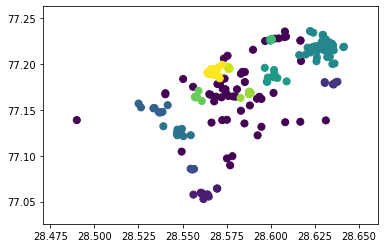

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(gdf.geometry.y, gdf.geometry.x, c=clusters,s=50)
fig.show()

In [20]:
gdf['cluster'] = clusters
gdf

/home/sourish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,amenity,name,geometry,cluster
0,node/248852574,cafe,Cafe Coffee Day,POINT (77.15189 28.53349),3
1,node/248852583,bank,"ICICI, SBI, Citibank,",POINT (77.15200 28.53365),3
2,node/266442982,cinema,PVR Priya,POINT (77.16449 28.55731),9
3,node/266443204,bank,Standard Chartered Bank,POINT (77.16455 28.55785),9
4,node/266443228,fast_food,McDonald's,POINT (77.16376 28.55733),9
...,...,...,...,...,...
935,node/6814370613,cafe,DePaul's,POINT (77.21867 28.62889),5
941,node/6853682651,cafe,Barista,POINT (77.16416 28.55701),9
942,node/6853682652,cafe,Costa Coffee,POINT (77.16409 28.55758),9
953,node/6853697496,cafe,Blue Tokai Coffee Roasters,POINT (77.16446 28.55786),9


In [21]:
gdf = gdf[gdf.cluster != -1]
gdf

,id,amenity,name,geometry,cluster
0,node/248852574,cafe,Cafe Coffee Day,POINT (77.15189 28.53349),3
1,node/248852583,bank,"ICICI, SBI, Citibank,",POINT (77.15200 28.53365),3
2,node/266442982,cinema,PVR Priya,POINT (77.16449 28.55731),9
3,node/266443204,bank,Standard Chartered Bank,POINT (77.16455 28.55785),9
4,node/266443228,fast_food,McDonald's,POINT (77.16376 28.55733),9
...,...,...,...,...,...
935,node/6814370613,cafe,DePaul's,POINT (77.21867 28.62889),5
941,node/6853682651,cafe,Barista,POINT (77.16416 28.55701),9
942,node/6853682652,cafe,Costa Coffee,POINT (77.16409 28.55758),9
953,node/6853697496,cafe,Blue Tokai Coffee Roasters,POINT (77.16446 28.55786),9


/home/sourish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


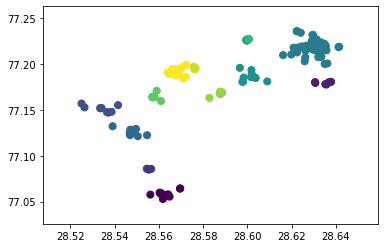

In [22]:
fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(gdf.geometry.y, gdf.geometry.x, c=gdf.cluster,s=50)
fig.show()

In [23]:
city_map = folium.Map([gdf.loc[0].geometry.y, gdf.loc[0].geometry.x], zoom_start=11)

for _, row in gdf.iterrows():
    folium.CircleMarker([row.geometry.y, row.geometry.x],
                        radius=1,
                        popup=row['amenity'],
                       ).add_to(city_map)

city_map

In [24]:
gdf['cluster'].value_counts()

5     147
12     18
9      13
10     12
6      12
4      11
11     10
0      10
3       9
7       8
1       6
8       5
2       5
Name: cluster, dtype: int64

In [25]:
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon

def create_hull(points):
    points = np.array(list(zip(points.geometry.x, points.geometry.y)))
    hull = ConvexHull(points)
    hull_points = points[hull.vertices,0], points[hull.vertices,1]
    
    return Polygon(zip(points[hull.vertices,0], points[hull.vertices,1]))    

In [26]:
clusters = dict()

for c in gdf.cluster.unique():
    clusters['cluster_' + str(c)] = create_hull(gdf[gdf.cluster == c])
clusters

{'cluster_3': <shapely.geometry.polygon.Polygon at 0x7f5bb31f63d0>,
 'cluster_9': <shapely.geometry.polygon.Polygon at 0x7f5bb31f6490>,
 'cluster_6': <shapely.geometry.polygon.Polygon at 0x7f5bb31f6450>,
 'cluster_12': <shapely.geometry.polygon.Polygon at 0x7f5bb31f64d0>,
 'cluster_5': <shapely.geometry.polygon.Polygon at 0x7f5bb31f6750>,
 'cluster_7': <shapely.geometry.polygon.Polygon at 0x7f5bb31f66d0>,
 'cluster_1': <shapely.geometry.polygon.Polygon at 0x7f5bb31f6510>,
 'cluster_4': <shapely.geometry.polygon.Polygon at 0x7f5bb31f6950>,
 'cluster_0': <shapely.geometry.polygon.Polygon at 0x7f5bb31f6850>,
 'cluster_8': <shapely.geometry.polygon.Polygon at 0x7f5bb31f6a50>,
 'cluster_11': <shapely.geometry.polygon.Polygon at 0x7f5bb31f6710>,
 'cluster_2': <shapely.geometry.polygon.Polygon at 0x7f5bb31f6b50>,
 'cluster_10': <shapely.geometry.polygon.Polygon at 0x7f5bb31f6a90>}

In [28]:
crs = {'init': 'epsg:4326'}

polygon = gpd.GeoDataFrame({
    'cluster': list(clusters.keys()),
    'geometry': list(clusters.values())}, crs=crs)
polygon

,cluster,geometry
0,cluster_3,"POLYGON ((77.15706 28.52505, 77.15527 28.54155..."
1,cluster_9,"POLYGON ((77.17096 28.55903, 77.15984 28.56095..."
2,cluster_6,"POLYGON ((77.18084 28.59781, 77.19606 28.59666..."
3,cluster_12,"POLYGON ((77.19465 28.56602, 77.19937 28.57251..."
4,cluster_5,"POLYGON ((77.21002 28.61620, 77.23615 28.62233..."
5,cluster_7,"POLYGON ((77.22639 28.59953, 77.22629 28.59996..."
6,cluster_1,"POLYGON ((77.18079 28.63791, 77.17786 28.63576..."
7,cluster_4,"POLYGON ((77.12247 28.55469, 77.12144 28.55046..."
8,cluster_0,"POLYGON ((77.05276 28.56185, 77.05759 28.55617..."
9,cluster_8,"POLYGON ((77.22756 28.60060, 77.22722 28.60071..."


In [ ]:
import folium
cluster = folium.Map([50.854457, 4.377184], zoom_start=5, tiles='cartodbpositron')
folium.GeoJson(polygon).add_to(m)
folium.LatLngPopup().add_to(m)
m